# **Лабораторная работа №5 "Прогнозирование временных рядов".**

В таблицах представлена статистика коэффициента загрузки гостиниц и средней цены по двум районам Чикаго: Chicago Central Business District Hotel Statistics и Chicago Metropolitan Area Hotel Statistics


Данные собирались ежемесячно с января 1994 по апрель 2003

Необходимо построить прогноз коэффициента загрузки гостиниц в районе Chicago Metropolitan Area Hotel Statistics (столбец x3) на 8 месяцев

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('seaborn')
%matplotlib inline

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Chicago_hotels.csv', decimal = ',', sep=';')
df

,date1,date2,x1,x2,x3,x4
0,January,1994,"44,3","104,04","51,9","72,15"
1,February,1994,"54,7","102,74","60,1","73,47"
2,March,1994,"61,9","105,23",65,"74,91"
3,April,1994,"69,1","113,63","69,8","79,06"
4,May,1994,"70,8","120,77","72,4","82,07"
...,...,...,...,...,...,...
115,August,2003,,,,
116,September,2003,,,,
117,October,2003,,,,
118,November,2003,,,,


In [ ]:
df_cut = df.drop(labels = [112, 113, 114, 115, 116, 117, 118, 119], axis = 0)
df_cut

,date1,date2,x1,x2,x3,x4
0,January,1994,"44,3","104,04","51,9","72,15"
1,February,1994,"54,7","102,74","60,1","73,47"
2,March,1994,"61,9","105,23",65,"74,91"
3,April,1994,"69,1","113,63","69,8","79,06"
4,May,1994,"70,8","120,77","72,4","82,07"
...,...,...,...,...,...,...
107,December,2002,"54,8","148,95","46,6","99,1"
108,January,2003,"51,6","132,89","45,3","92,88"
109,February,2003,"52,7","127,44","50,8","90,99"
110,March,2003,65,"147,32","55,9","99,62"


In [ ]:
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 111
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date1   112 non-null    object
 1   date2   112 non-null    int64 
 2   x1      112 non-null    object
 3   x2      112 non-null    object
 4   x3      112 non-null    object
 5   x4      112 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.1+ KB


Переведу нужный столбец данных из типа object во float

In [ ]:
df_cut['x3'] = df_cut['x3'].astype(str).str.replace(',', '.')
df_cut['x3'] = df_cut['x3'].astype(float)

df_0 = df_cut[['date1', 'date2', 'x3']]

In [ ]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date1   112 non-null    object 
 1   date2   112 non-null    int64  
 2   x3      112 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.5+ KB


In [ ]:
df_0

,date1,date2,x3
0,January,1994,51.9
1,February,1994,60.1
2,March,1994,65.0
3,April,1994,69.8
4,May,1994,72.4
...,...,...,...
107,December,2002,46.6
108,January,2003,45.3
109,February,2003,50.8
110,March,2003,55.9


Text(0, 0.5, 'log10 от коэффициента загрузки')

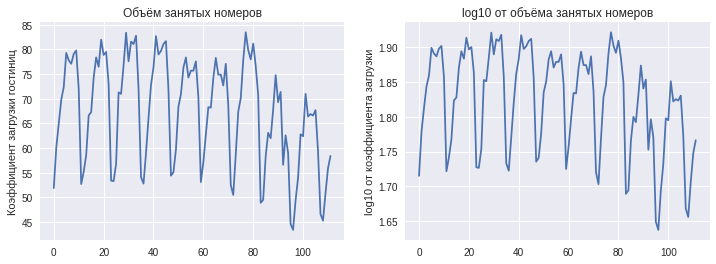

In [ ]:
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
df_0['x3'].plot(ax=ax1)
ax1.set_title(u'Объём занятых номеров')
ax1.set_ylabel(u'Коэффициент загрузки гостиниц')

ax2 = fig.add_subplot(122)
pd.Series(np.log10(df_0['x3'])).plot(ax=ax2)
ax2.set_title(u'log10 от объёма занятых номеров')
ax2.set_ylabel(u'log10 от коэффициента загрузки')

**Отвечаю на вопросы по графику временного ряда:**

1) У ряда есть тренд, можно описать параболой.
2) Есть аддитивная сезонность.
3) Ряд не сильно менял свой характер.
4) Выбросов у ряда нет.
5) Пропусков нет.

Создам регрессионную переменную month_num -- порядковый номер пары (месяц, год).

In [ ]:
df_0['month_num'] = range(1, len(df_0) + 1)

df_0.head()

<ipython-input-160-2e38c6a52eb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['month_num'] = range(1, len(df_0) + 1)


,date1,date2,x3,month_num
0,January,1994,51.9,1
1,February,1994,60.1,2
2,March,1994,65.0,3
3,April,1994,69.8,4
4,May,1994,72.4,5


In [ ]:
df_0["m01"] = ([1,0,0,0,0,0,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m02"] = ([0,1,0,0,0,0,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m03"] = ([0,0,1,0,0,0,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m04"] = ([0,0,0,1,0,0,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m05"] = ([0,0,0,0,1,0,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m06"] = ([0,0,0,0,0,1,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m07"] = ([0,0,0,0,0,0,1,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m08"] = ([0,0,0,0,0,0,0,1,0,0,0,0]*10)[0:len(df_0)]
df_0["m09"] = ([0,0,0,0,0,0,0,0,1,0,0,0]*10)[0:len(df_0)]
df_0["m10"] = ([0,0,0,0,0,0,0,0,0,1,0,0]*10)[0:len(df_0)]
df_0["m11"] = ([0,0,0,0,0,0,0,0,0,0,1,0]*10)[0:len(df_0)]
df_0["m12"] = ([0,0,0,0,0,0,0,0,0,0,0,1]*10)[0:len(df_0)]

<ipython-input-161-dbf5f9c16657>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0["m01"] = ([1,0,0,0,0,0,0,0,0,0,0,0]*10)[0:len(df_0)]


In [ ]:
df_0.tail(16)

,date1,date2,x3,month_num,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
96,January,2002,43.4,97,1,0,0,0,0,0,0,0,0,0,0,0
97,February,2002,49.4,98,0,1,0,0,0,0,0,0,0,0,0,0
98,March,2002,54.0,99,0,0,1,0,0,0,0,0,0,0,0,0
99,April,2002,62.8,100,0,0,0,1,0,0,0,0,0,0,0,0
100,May,2002,62.4,101,0,0,0,0,1,0,0,0,0,0,0,0
101,June,2002,71.0,102,0,0,0,0,0,1,0,0,0,0,0,0
102,July,2002,66.4,103,0,0,0,0,0,0,1,0,0,0,0,0
103,August,2002,66.9,104,0,0,0,0,0,0,0,1,0,0,0,0
104,September,2002,66.6,105,0,0,0,0,0,0,0,0,1,0,0,0
105,October,2002,67.7,106,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
X = df_0.drop(columns=['date1', 'date2', 'x3', 'm01'])
y = df_0['x3']

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,57.138035
1,month_num,-0.104146
2,m02,6.104146
3,m03,13.408292
4,m04,16.232438
5,m05,21.537263
6,m06,27.352521
7,m07,23.667778
8,m08,25.060813
9,m09,23.576070


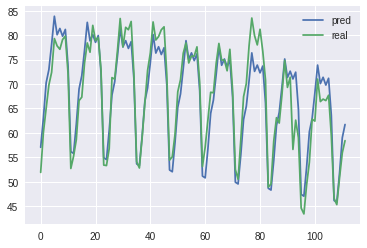

In [ ]:
pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot()

In [ ]:
df_3= pd.DataFrame()

df_3['month_num'] = range(len(df_0)+1, len(df_0)+9)

In [ ]:
df_3

,month_num
0,113
1,114
2,115
3,116
4,117
5,118
6,119
7,120


In [ ]:
df_3["m02"] = ([0,1,0,0,0,0,0,0,0,0,0,0])[0: 8 ]
df_3["m03"] = ([0,0,1,0,0,0,0,0,0,0,0,0])[0: 8 ]
df_3["m04"] = ([0,0,0,1,0,0,0,0,0,0,0,0])[0: 8 ]
df_3["m05"] = ([0,0,0,0,1,0,0,0,0,0,0,0])[0: 8 ]
df_3["m06"] = ([0,0,0,0,0,1,0,0,0,0,0,0])[0: 8 ]
df_3["m07"] = ([0,0,0,0,0,0,1,0,0,0,0,0])[0: 8 ]
df_3["m08"] = ([0,0,0,0,0,0,0,1,0,0,0,0])[0: 8 ]
df_3["m09"] = ([0,0,0,0,0,0,0,0,1,0,0,0])[0: 8 ]
df_3["m10"] = ([0,0,0,0,0,0,0,0,0,1,0,0])[0: 8 ]
df_3["m11"] = ([0,0,0,0,0,0,0,0,0,0,1,0])[0: 8 ]
df_3["m12"] = ([0,0,0,0,0,0,0,0,0,0,0,1])[0: 8 ]

In [ ]:
df_3

,month_num,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,113,0,0,0,0,0,0,0,0,0,0,0
1,114,1,0,0,0,0,0,0,0,0,0,0
2,115,0,1,0,0,0,0,0,0,0,0,0
3,116,0,0,1,0,0,0,0,0,0,0,0
4,117,0,0,0,1,0,0,0,0,0,0,0
5,118,0,0,0,0,1,0,0,0,0,0,0
6,119,0,0,0,0,0,1,0,0,0,0,0
7,120,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
model.predict(df_3)

array([45.36952675, 51.36952675, 58.56952675, 61.28952675, 66.49020576,
       72.20131687, 68.41242798, 69.70131687])

In [ ]:
#  матрица с подгонкой
pred['forecast'] = np.nan

#  Все хорошо?
pred.head()

,pred,real,forecast
0,57.033889,51.9,NaN
1,63.033889,60.1,NaN
2,70.233889,65.0,NaN
3,72.953889,69.8,NaN
4,78.154568,72.4,NaN


In [ ]:
pred_2 = pd.DataFrame(model.predict(df_3), columns=['forecast'])
pred_2['real'] = np.nan
pred_2['pred'] = np.nan

pred_2.head()

,forecast,real,pred
0,45.369527,NaN,NaN
1,51.369527,NaN,NaN
2,58.569527,NaN,NaN
3,61.289527,NaN,NaN
4,66.490206,NaN,NaN


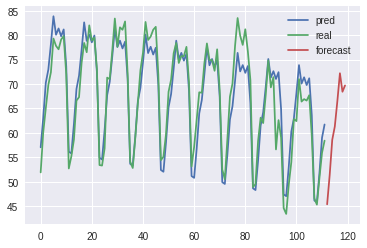

In [ ]:
#  объединяем матрицы, задаем новые индексы
pred_3 = pd.concat(
    [pred, pred_2],
    sort=False
).reset_index(drop=True)

pred_3.plot()

# **Вывод**

Прогноз на май 2003: **45.4**

Прогноз на июнь 2003: **51.4**

Прогноз на июль 2003: **58.6**

Прогноз на август 2003: **61.3**

Прогноз на сентябрь 2003: **66.5**

Прогноз на октябрь 2003: **72.2**

Прогноз на ноябрь 2003: **68.4**

Прогноз на декабрь 2003: **69.7**